In [63]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from src.utils import load_data_template
from src.features.games import GameFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
teams = pd.read_csv('data/Teams.csv')
teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [65]:
seasons = pd.read_csv('data/Seasons.csv')
seasons.head()

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast


In [66]:
seeds = pd.read_csv('data/NCAATourneySeeds.csv')
seeds.head()

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


In [67]:
season_results = pd.read_csv('data/RegularSeasonCompactResults.csv')
season_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [68]:
tournament_results = pd.read_csv('data/NCAATourneyCompactResults.csv')
tournament_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [69]:
rankings = pd.read_csv('data/MasseyOrdinals.csv',dtype={'Season':'str',
                                                        'TeamID':'str'})
rankings.head()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260


----

------

---

In [70]:
df = rankings.pivot_table(values = 'OrdinalRank', 
                     index = ['Season', 'RankingDayNum', 'TeamID'], 
                     columns = 'SystemName').fillna(0).reset_index()
print(df.shape)
df.sample()

(211603, 162)


SystemName,Season,RankingDayNum,TeamID,7OT,ACU,ADE,AP,ARG,AUS,BBT,...,UPS,USA,WIL,WLK,WMR,WOB,WOL,WTE,YAG,ZAM
133575,2011,15,1286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df.tail()

SystemName,Season,RankingDayNum,TeamID,7OT,ACU,ADE,AP,ARG,AUS,BBT,...,UPS,USA,WIL,WLK,WMR,WOB,WOL,WTE,YAG,ZAM
211598,2017,133,1460,157.0,0.0,121.0,0.0,131.0,0.0,165.0,...,0.0,0.0,130.0,165.0,0.0,132.0,130.0,0.0,171.0,175.0
211599,2017,133,1461,181.0,0.0,150.0,0.0,148.0,0.0,156.0,...,0.0,0.0,120.0,151.0,0.0,128.0,146.0,0.0,127.0,143.0
211600,2017,133,1462,45.0,0.0,38.0,0.0,38.0,0.0,51.0,...,0.0,0.0,34.0,46.0,0.0,39.0,38.0,0.0,37.0,39.0
211601,2017,133,1463,123.0,0.0,116.0,0.0,127.0,0.0,138.0,...,0.0,0.0,144.0,135.0,0.0,148.0,132.0,0.0,150.0,172.0
211602,2017,133,1464,317.0,0.0,275.0,0.0,271.0,0.0,294.0,...,0.0,0.0,254.0,291.0,0.0,255.0,257.0,0.0,285.0,283.0


### Performing PCA Analysis

In [74]:
pca = PCA()
X = df.values
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

In [75]:
print(pca.explained_variance_)

[ 166559.18027067   51610.95793603   31634.10377704   24557.15605149
   18291.56772408   14170.85355725   11276.17962722   10935.55768785
    9053.5091141     8367.7784714     7634.67775918    7112.51059241
    6515.6831817     5995.95095513    5848.16910529    5475.83622819
    5282.85302571    5154.25287588    4638.49672701    4212.80854131]


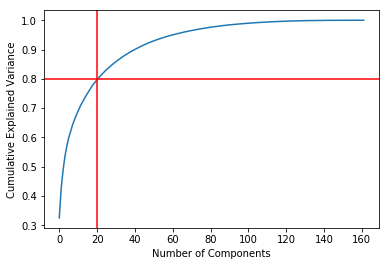

In [76]:
pca_plot = PCA().fit(X)
plt.plot(np.cumsum(pca_plot.explained_variance_ratio_))
plt.axhline(y=0.8, color = 'r')
plt.axvline(x=20, color = 'r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

### We can add more variables but the first 20 PC seem to capture most of the variance

In [77]:
X_std = StandardScaler().fit_transform(X)

/Users/feliuserraburriel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [78]:
X_std.T

array([[ -1.5878289 ,  -1.5878289 ,  -1.5878289 , ...,   2.07448838,
          2.07448838,   2.07448838],
       [ -1.1615867 ,  -1.1615867 ,  -1.1615867 , ...,   1.64981142,
          1.64981142,   1.64981142],
       [ -1.74303033,  -1.73347728,  -1.72392423, ...,   1.6960672 ,
          1.70562024,   1.71517329],
       ..., 
       [ -0.05911436,  -0.05911436,  -0.05911436, ...,  -0.05911436,
         -0.05911436,  -0.05911436],
       [ -0.03531853,  -0.03531853,  -0.03531853, ...,   4.44084977,
         18.11130972,  34.44327515],
       [ -0.07917241,  -0.07917241,  -0.07917241, ...,   2.03612033,
          9.24981092,  15.27025947]])

In [ ]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

In [80]:
import importlib
import src
importlib.reload(src)
importlib.reload(src.features.rankings)
from src.features.rankings import RankingFeatures
from src.utils import load_data_template
data = load_data_template()
data.dropna(inplace=True)
ranking_detail_feat = RankingFeatures(default_lags=3)
data = ranking_detail_feat.per_team_wrapper(data, ranking_detail_feat.pca_variables_rankings, per_day=True)

print(data.shape)
data.sample()

(2117, 167)


,Season,team_a,team_b,in_target,game_set,a_win,DayNum,PC1_team_a,PC2_team_a,PC3_team_a,...,PC17_team_b_lag-3,PC18_team_b_lag-1,PC18_team_b_lag-2,PC18_team_b_lag-3,PC19_team_b_lag-1,PC19_team_b_lag-2,PC19_team_b_lag-3,PC20_team_b_lag-1,PC20_team_b_lag-2,PC20_team_b_lag-3
10868,2012,1211,1326,False,0,False,138,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
ranking_detail_feat.lag_features(ranking_detail_feat.pca_variables_rankings(data, team="team_a"), drop_unlagged=False)

PC1_team_a  PC2_team_a  PC3_team_a  PC4_team_a  \
TeamID Season RankingDayNum                                                    
1101   2014   9               442.101177   84.987769 -158.589830 -279.157157   
              16              508.925224  149.532347 -142.134416 -268.304113   
              23              610.371144  164.549180 -259.327273 -327.102765   
              30             1024.052686   33.577306 -265.892407 -318.229429   
              37             1134.621309    6.423298 -336.487912 -387.579629   
              44             1245.316997  -86.963385 -292.440003 -560.669478   
              51             1222.007380  -95.199169 -279.225750 -553.891644   
              58             1505.513317 -264.553467 -130.876102 -508.208807   
              65             1534.580371 -277.463447 -153.128092 -512.909154   
              72             1530.414259 -289.938721 -128.564539 -574.559069   
              79             1530.104927 -201.330476 -132.060284 -493.552508   
              86             1683.360749 -269.176038 -128.593677 -485.510574   
              93             1688.646600 -269.723259 -127.577666 -490.511143   
              100            1673.422264 -177.521333  -97.668811 -475.679942   
              107            1683.403575 -182.221776  -61.853242 -433.930923   
              114            1725.351048 -263.468337  -29.291197 -409.419247   
              121            1807.847662 -302.402527 -130.931427 -472.555989   
              128            1865.523396 -264.760188 -116.177338 -387.215890   
              133            1820.016102 -208.316666 -142.469084 -405.270068   
       2015   16              306.899299    1.571946 -193.027312  -38.073058   
              23              496.417806  -48.481398 -373.901960  -40.832017   
              30              938.139419 -148.695174 -409.371860 -147.720605   
              37              980.223312 -320.522317 -275.140852 -141.051588   
              44             1194.415426 -197.500687 -300.600315 -262.751271   
              51             1318.034439 -260.387894 -348.963211 -206.196239   
              58             1357.813538 -292.386961 -158.837812 -102.982535   
              65             1371.782262 -336.323010 -154.744042 -196.685051   
              72             1688.355703 -351.499484 -155.543421  -67.345408   
              79             1622.085135 -355.043519 -127.852372  -66.471835   
              86             1713.898242 -393.866786  -90.517302 -104.891483   
...                                  ...         ...         ...         ...   
1464   2016   58             1014.126811 -455.887930 -176.017756   95.670777   
              65             1315.586646 -484.612430 -108.930853  171.935338   
              72             1176.537522 -426.953975 -119.157973  270.035979   
              79             1430.675809 -511.259808 -133.899915  333.824819   
              86             1361.532242 -501.812459 -146.891302  338.813133   
              93             1331.198821 -482.564692 -173.817037  355.698108   
              100            1483.216940 -549.550288 -137.436433  386.255198   
              107            1556.271631 -556.478667 -142.853313  368.611493   
              114            1580.482053 -548.257883 -144.964813  336.095543   
              121            1625.434008 -511.058115 -125.643379  374.755583   
              128            1625.336146 -523.292364 -114.505041  372.301703   
              133            1555.028635 -507.119504  -20.457885  385.211515   
       2017   16              283.863648  -95.174157 -221.339769   32.773176   
              23              370.797721 -126.171289 -257.567630   46.679485   
              30              518.059631 -239.414342 -325.888267  204.838013   
              37              777.170372 -452.741313 -255.669419  287.406197   
              44             1045.153042 -475.844051 -229.120413  519.387407   
              51             1

In [82]:
df.tail()

SystemName,Season,RankingDayNum,TeamID,7OT,ACU,ADE,AP,ARG,AUS,BBT,...,UPS,USA,WIL,WLK,WMR,WOB,WOL,WTE,YAG,ZAM
211598,2017,133,1460,157.0,0.0,121.0,0.0,131.0,0.0,165.0,...,0.0,0.0,130.0,165.0,0.0,132.0,130.0,0.0,171.0,175.0
211599,2017,133,1461,181.0,0.0,150.0,0.0,148.0,0.0,156.0,...,0.0,0.0,120.0,151.0,0.0,128.0,146.0,0.0,127.0,143.0
211600,2017,133,1462,45.0,0.0,38.0,0.0,38.0,0.0,51.0,...,0.0,0.0,34.0,46.0,0.0,39.0,38.0,0.0,37.0,39.0
211601,2017,133,1463,123.0,0.0,116.0,0.0,127.0,0.0,138.0,...,0.0,0.0,144.0,135.0,0.0,148.0,132.0,0.0,150.0,172.0
211602,2017,133,1464,317.0,0.0,275.0,0.0,271.0,0.0,294.0,...,0.0,0.0,254.0,291.0,0.0,255.0,257.0,0.0,285.0,283.0


In [134]:
pd.concat([df.reset_index(), df_pca.reset_index()], axis = 1)

,Season,RankingDayNum,TeamID,7OT,ACU,ADE,AP,ARG,AUS,BBT,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,2003,35,1102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.825586,34.556677,74.234314,4.348643,4.533346,-41.649164,8.082587,-29.858810,-27.449009,2.883854
1,2003,35,1103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.945028,53.665826,109.195689,16.456628,6.268666,-59.230951,12.592138,-43.326625,-40.208719,2.171756
2,2003,35,1104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.625241,-5.572535,0.815428,-21.078125,0.889174,-4.727411,-1.387469,-1.576399,-0.653618,4.379260
3,2003,35,1105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.661492,76.869793,151.648787,31.159181,8.375840,-80.580264,18.068021,-59.680401,-55.702652,1.307065
4,2003,35,1106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.312209,62.128449,124.678584,21.818736,7.037165,-67.017171,14.589225,-49.290943,-45.859447,1.856398
5,2003,35,1107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.407725,59.125583,119.184653,19.916052,6.764472,-64.254319,13.880581,-47.174572,-43.854350,1.968299
6,2003,35,1108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.771893,53.392839,108.696241,16.283657,6.243876,-58.979783,12.527716,-43.134228,-40.026437,2.181929
7,2003,35,1110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.616656,46.841130,96.709484,12.132348,5.648909,-52.951742,10.981584,-38.516691,-35.651679,2.426077
8,2003,35,1111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.980823,41.108386,86.221071,8.499952,5.128313,-47.677206,9.628719,-34.476347,-31.823767,2.639706
9,2003,35,1112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.201353,-1.750706,7.807703,-18.656528,1.236238,-8.243769,-0.485559,-4.269962,-3.205560,4.236840


In [129]:
data.describe()

,game_set,FGM_game_team_a_lag-1,FGM_game_team_a_lag-2,FGM_game_team_a_lag-3,FGA_game_team_a_lag-1,FGA_game_team_a_lag-2,FGA_game_team_a_lag-3,FGM3_game_team_a_lag-1,FGM3_game_team_a_lag-2,FGM3_game_team_a_lag-3,...,TO_game_team_b_lag-3,Stl_game_team_b_lag-1,Stl_game_team_b_lag-2,Stl_game_team_b_lag-3,Blk_game_team_b_lag-1,Blk_game_team_b_lag-2,Blk_game_team_b_lag-3,PF_game_team_b_lag-1,PF_game_team_b_lag-2,PF_game_team_b_lag-3
count,77617.000000,77617.000000,77617.000000,77617.000000,77617.000000,77617.000000,77617.000000,77617.000000,77617.000000,77617.000000,...,77617.000000,77617.000000,77617.000000,77617.000000,77617.000000,77617.000000,77617.000000,77617.000000,77617.000000,77617.000000
mean,0.987361,24.150650,24.158870,24.151475,55.539250,55.531958,55.522759,6.467076,6.470683,6.472422,...,13.708092,6.539134,6.551129,6.551374,3.362073,3.366131,3.358839,18.637219,18.635067,18.629914
std,0.111711,4.868871,4.860452,4.874180,7.675314,7.671153,7.689649,2.923393,2.926220,2.937044,...,4.320940,3.019224,3.022082,3.019463,2.312918,2.320408,2.320492,4.495558,4.512966,4.512138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000
25%,1.000000,21.000000,21.000000,21.000000,50.000000,50.000000,50.000000,4.000000,4.000000,4.000000,...,11.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,16.000000,16.000000,15.000000
50%,1.000000,24.000000,24.000000,24.000000,55.000000,55.000000,55.000000,6.000000,6.000000,6.000000,...,13.000000,6.000000,6.000000,6.000000,3.000000,3.000000,3.000000,18.000000,18.000000,18.000000
75%,1.000000,27.000000,27.000000,27.000000,60.000000,60.000000,60.000000,8.000000,8.000000,8.000000,...,16.000000,8.000000,8.000000,8.000000,5.000000,5.000000,5.000000,22.000000,22.000000,22.000000
max,1.000000,56.000000,56.000000,56.000000,106.000000,106.000000,106.000000,25.000000,25.000000,25.000000,...,41.000000,26.000000,26.000000,26.000000,19.000000,19.000000,19.000000,45.000000,45.000000,45.000000


In [45]:
data.dtypes

Season                                object
team_a                                object
team_b                                object
in_target                               bool
game_set                               int64
a_win                                 object
DayNum                               float64
games_won_in_season_team_a             int64
games_won_in_season_team_a_lag-1     float64
games_won_in_season_team_a_lag-2     float64
games_won_in_season_team_a_lag-3     float64
games_won_in_season_team_b             int64
games_won_in_season_team_b_lag-1     float64
games_won_in_season_team_b_lag-2     float64
games_won_in_season_team_b_lag-3     float64
games_won_in_tourney_team_a_lag-1    float64
games_won_in_tourney_team_a_lag-2    float64
games_won_in_tourney_team_a_lag-3    float64
games_won_in_tourney_team_b_lag-1    float64
games_won_in_tourney_team_b_lag-2    float64
games_won_in_tourney_team_b_lag-3    float64
dtype: object

In [73]:
df.dtypes

SystemName
Season            object
RankingDayNum      int64
TeamID            object
7OT              float64
ACU              float64
ADE              float64
AP               float64
ARG              float64
AUS              float64
BBT              float64
BCM              float64
BD               float64
BIH              float64
BKM              float64
BLS              float64
BNM              float64
BOB              float64
BOW              float64
BP5              float64
BPI              float64
BRZ              float64
BUR              float64
BWE              float64
CJB              float64
CMV              float64
CNG              float64
COL              float64
CPA              float64
CPR              float64
CRO              float64
                  ...   
SIM              float64
SMN              float64
SMS              float64
SP               float64
SPR              float64
SPW              float64
STF              float64
STH              float64
STR           

In [76]:

for team, opponent_team in [('a','b'), ('b','a')]:
    data = pd.merge(data, df,
        left_on=['Season','DayNum','team_{}'.format(team)],
        right_on=['Season','RankingDayNum', 'TeamID'],
        how='left')

In [77]:
data_rk.describe() # Wrong, still not properly merged

,game_set,games_won_in_season_team_a,games_won_in_season_team_a_lag-1,games_won_in_season_team_a_lag-2,games_won_in_season_team_a_lag-3,games_won_in_season_team_b,games_won_in_season_team_b_lag-1,games_won_in_season_team_b_lag-2,games_won_in_season_team_b_lag-3,games_won_in_tourney_team_a_lag-1,...,UPS,USA,WIL,WLK,WMR,WOB,WOL,WTE,YAG,ZAM
count,10961.0,10961.000000,10961.000000,10961.000000,10961.000000,10961.000000,10961.000000,10961.000000,10961.000000,10961.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.0,23.194690,20.474774,19.988687,19.362376,23.271508,20.640361,19.639449,18.686616,1.058024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,3.672776,5.574342,5.949641,6.328915,3.616820,5.607121,5.935704,6.180855,1.465762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,11.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.0,21.000000,17.000000,16.000000,15.000000,21.000000,17.000000,16.000000,15.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.0,23.000000,21.000000,21.000000,20.000000,23.000000,21.000000,20.000000,19.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.0,25.000000,24.000000,24.000000,24.000000,26.000000,25.000000,24.000000,23.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.0,34.000000,34.000000,34.000000,33.000000,34.000000,34.000000,34.000000,33.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# TODO:

- Select the first 20 PCAs
- Properly append/merge for team_a and team_b using team_wrapper
-----------
- Create the RandomizedPCA variables
- Create the sparse_pca variables
